In [93]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdFMCS
from rdkit.Chem import rdChemReactions

## Add to blog post
- Note that using a SMILES string as a dictionary key isn't the best idea, because can be long
- PubChem asks you to limit API requests to 5 per second, so shouldn't run too many reactions at once without adding some wait logic
- Assuming only one product for a reaction

## Pictet-Spengler rxn

In [115]:
rxn_fwd = Chem.ReactionFromSmarts('[cH1:1]1:[c:2](-[CH2:7]-[CH2:8]-[NH2:9]):[c:3]:[c:4]:[c:5]:[c:6]:1.[#6:11]-[CH1;R0:10]=[OD1]>>[c:1]12:[c:2](-[CH2:7]-[CH2:8]-[NH1:9]-[C:10]-2(-[#6:11])):[c:3]:[c:4]:[c:5]:[c:6]:1')
rxn_fwd
print(rxn_fwd)

TODO: Make reversing a reaction into a function

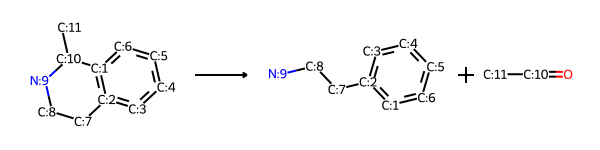

In [95]:
rxn_rev = Chem.ChemicalReaction()
for i in range(rxn_fwd.GetNumReactantTemplates()):
    rxn_rev.AddProductTemplate(rxn_fwd.GetReactantTemplate(i))
for i in range(rxn_fwd.GetNumProductTemplates()):
    rxn_rev.AddReactantTemplate(rxn_fwd.GetProductTemplate(i))
rxn_rev.Initialize()
rxn_rev

## TODO: Start with targets, then reverse reaction to get starting materials

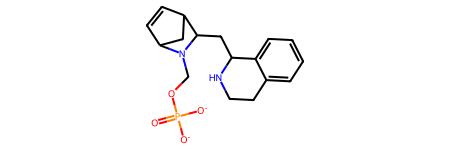

In [96]:
target_bicyclic_smiles = "O=P([O-])([O-])OCN1C2C=CC(C2)C1CC1NCCc2ccccc21"
target_bicyclic = Chem.MolFromSmiles(target_bicyclic_smiles)
target_bicyclic

In [97]:
starting_materials_bicyclic = rxn_rev.RunReactants([target_bicyclic])

In [98]:
starting_materials_bicyclic

((<rdkit.Chem.rdchem.Mol at 0x7f8d38d21230>,
  <rdkit.Chem.rdchem.Mol at 0x7f8d38d21150>),)

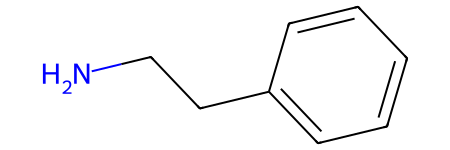

In [99]:
starting_materials_bicyclic[0][0]

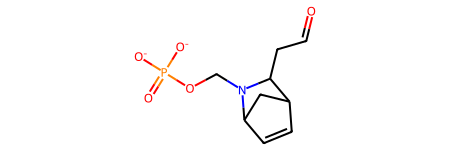

In [100]:
starting_materials_bicyclic[0][1]

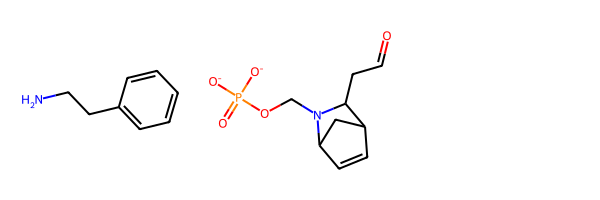

In [101]:
reacts_bicyclic = [material for material in starting_materials_bicyclic[0]]
for molecule in reacts_bicyclic:
    Chem.SanitizeMol(molecule)
reacts_bicyclic
Draw.MolsToGridImage(reacts_bicyclic)

/var/folders/9w/cn8tqbv976gckxd0c9cbr1sw0000gn/T/ipykernel_11436/1126054629.py:3: RuntimeWarning: coroutine 'is_commercially_available' was never awaited
  react_available = is_commercially_available(Chem.MolToSmiles(react))


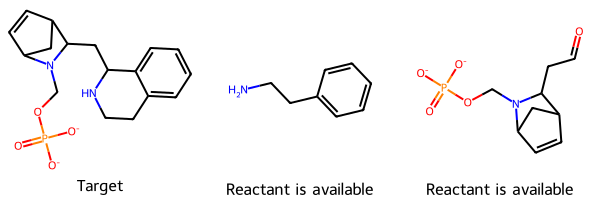

In [102]:
reacts_bicyclic_legend = []
for react in reacts_bicyclic:
    react_available = is_commercially_available(Chem.MolToSmiles(react))
    legend = "Reactant"
    if react_available:
        legend += " is available"
    else:
        legend += " is NOT available"
    reacts_bicyclic_legend.append(legend)
Draw.MolsToGridImage([target_bicyclic] + reacts_bicyclic, legends=["Target"] + reacts_bicyclic_legend)

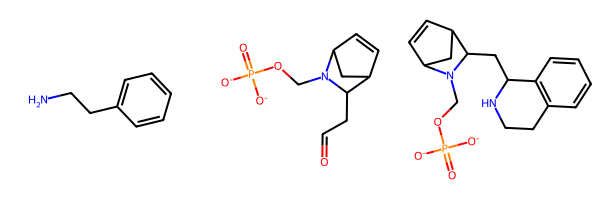

In [103]:
reacts_bicyclic = [Chem.MolFromSmiles(m) for m in ('NCCc1ccccc1','[O-]P([O-])(=O)OCN1C(CC=O)C2CC1C=C2')]
ps_bicyclic = rxn_fwd.RunReactants(reacts_bicyclic)
ps0_bicyclic = ps_bicyclic[0]
for p in ps0_bicyclic:
    Chem.SanitizeMol(p)
Draw.MolsToGridImage(reacts_bicyclic + [ps0_bicyclic[0]])

In [104]:
Chem.MolToSmiles(ps_bicyclic[0][0])

'O=P([O-])([O-])OCN1C2C=CC(C2)C1CC1NCCc2ccccc21'

In [105]:
# reacts_bicyclic = [Chem.MolFromSmiles(m) for m in ('NCCc1ccccc1','O=CCC1CC2CC1C=C2')]
# ps_bicyclic = rxn_fwd.RunReactants(reacts_bicyclic)
# ps0_bicyclic = ps_bicyclic[0]
# for p in ps0_bicyclic:
#     Chem.SanitizeMol(p)
# Draw.MolsToGridImage(reacts_bicyclic + [ps0_bicyclic[0]])

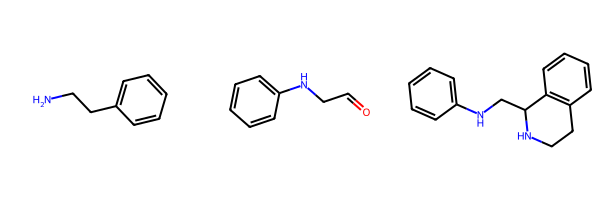

In [106]:
reacts_aniline = [Chem.MolFromSmiles(m) for m in ('NCCc1ccccc1','c1ccccc1NCC(=O)')]
ps_aniline = rxn_fwd.RunReactants(reacts_aniline)
ps0_aniline = ps_aniline[0]
for p in ps0_aniline:
    Chem.SanitizeMol(p)
Draw.MolsToGridImage(reacts_aniline + [ps0_aniline[0]])

In [117]:
Chem.MolToSmiles(ps0_aniline[0])

'c1ccc(NCC2NCCc3ccccc32)cc1'

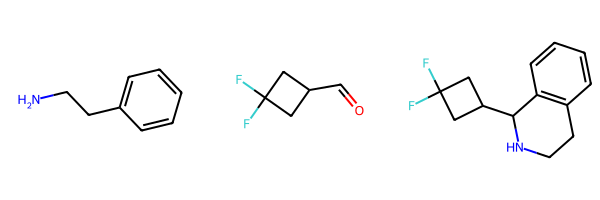

In [107]:
reacts_cyclobutyl = [Chem.MolFromSmiles(m) for m in ('NCCc1ccccc1','C1C(F)(F)CC1C(=O)')]
ps_cyclobutyl = rxn_fwd.RunReactants(reacts_cyclobutyl)
ps0_cyclobutyl = ps_cyclobutyl[0]
for p in ps0_cyclobutyl:
    Chem.SanitizeMol(p)
Draw.MolsToGridImage(reacts_cyclobutyl + [ps0_cyclobutyl[0]])

In [118]:
Chem.MolToSmiles(ps0_cyclobutyl[0])

'FC1(F)CC(C2NCCc3ccccc32)C1'

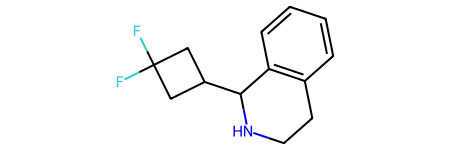

In [113]:
ps0_cyclobutyl[0]

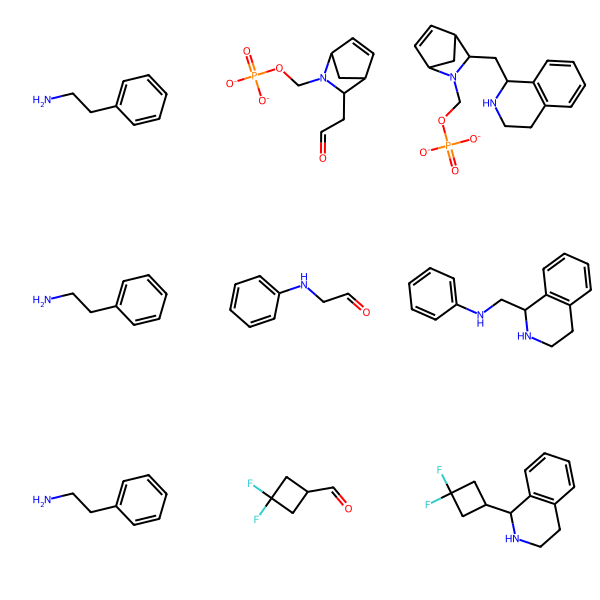

In [108]:
Draw.MolsToGridImage(reacts_bicyclic + [ps0_bicyclic[0]] + reacts_aniline + [ps0_aniline[0]] + reacts_cyclobutyl + [ps0_cyclobutyl[0]], molsPerRow=3)

## Is chemical available? Searching for vendors on PubChem

If chemical is available

Request:
https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/2244?heading=Chemical-Vendors

Response:
<Record xs:schemaLocation="http://pubchem.ncbi.nlm.nih.gov/pug_view https://pubchem.ncbi.nlm.nih.gov/pug_view/pug_view.xsd">
<RecordType>CID</RecordType>
<RecordNumber>2244</RecordNumber>
<RecordTitle>Aspirin</RecordTitle>
<Section>
<TOCHeading>Chemical Vendors</TOCHeading>
<Description>
A list of chemical vendors that sell this compound. Note that the order of chemical vendors on the list is randomized, and that PubChem do not endorse any of the vendors. Each vendor may have multiple products containing the same chemical, but different in various aspects, such as amount and purity. For each product, the external identifier used to locate the product on the vendor's website is provided under the Purchasable Chemical column, and clicking this identifier directs you to the vendor's website. The information on the product provided by the vendor to PubChem can be accessed at the Summary page of the corresponding PubChem Substance ID (SID).
</Description>
<Information>
<ReferenceNumber>183</ReferenceNumber>
<Value>
<Boolean>true</Boolean>
</Value>
</Information>
</Section>
<Reference>
<ReferenceNumber>183</ReferenceNumber>
<SourceName>PubChem</SourceName>
<SourceID>PubChem</SourceID>
<Description>Data deposited in or computed by PubChem</Description>
<URL>https://pubchem.ncbi.nlm.nih.gov</URL>
</Reference>
</Record>

If chemical is NOT available

Request:
https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/123953822?heading=Chemical-Vendors

Response:
<Fault xs:schemaLocation="http://pubchem.ncbi.nlm.nih.gov/pug_view https://pubchem.ncbi.nlm.nih.gov/pug_view/pug_view.xsd">
<Code>PUGVIEW.NotFound</Code>
<Message>No data found</Message>
</Fault>

In [109]:
import requests
response = requests.get("https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/123953822/xml?heading=Chemical-Vendors")
data = response.text
data

'<?xml version="1.0" encoding="UTF-8"?>\n<Fault\n    xmlns="http://pubchem.ncbi.nlm.nih.gov/pug_view"\n    xmlns:xs="http://www.w3.org/2001/XMLSchema-instance"\n    xs:schemaLocation="http://pubchem.ncbi.nlm.nih.gov/pug_view https://pubchem.ncbi.nlm.nih.gov/pug_view/pug_view.xsd"\n>\n  <Code>PUGVIEW.NotFound</Code>\n  <Message>No data found</Message>\n</Fault>\n'

In [110]:
response = requests.get("https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/2244/XML?heading=Chemical-Vendors")
data = response.text
data

'<?xml version="1.0" encoding="UTF-8"?>\n<Record\n    xmlns="http://pubchem.ncbi.nlm.nih.gov/pug_view"\n    xmlns:xs="http://www.w3.org/2001/XMLSchema-instance"\n    xs:schemaLocation="http://pubchem.ncbi.nlm.nih.gov/pug_view https://pubchem.ncbi.nlm.nih.gov/pug_view/pug_view.xsd"\n>\n  <RecordType>CID</RecordType>\n  <RecordNumber>2244</RecordNumber>\n  <RecordTitle>Aspirin</RecordTitle>\n  <Section>\n    <TOCHeading>Chemical Vendors</TOCHeading>\n    <Description>A list of chemical vendors that sell this compound. Note that the order of chemical vendors on the list is randomized, and that PubChem do not endorse any of the vendors. Each vendor may have multiple products containing the same chemical, but different in various aspects, such as amount and purity.  For each product, the external identifier used to locate the product on the vendor&apos;s website is provided under the Purchasable Chemical column, and clicking this identifier directs you to the vendor&apos;s website.  The inf

In [111]:
import requests
import asyncio
import time
async def is_commercially_available(smiles: str) -> bool or None:
    start = time.perf_counter()
    # Get PubChem CID (identifier number) for SMILES string
    print(f"is_commercially_available({smiles})")
    get_cid_url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/smiles/{smiles}/cids/TXT"

    # get_cid_response = requests.get(get_cid_url)

    try:
        task_1 = asyncio.create_task(requests.get(get_cid_url))
        get_cid_response = await task_1
    except:
        # print("get_cid_response failed")
        return None
    cid = get_cid_response.text.strip("\n")

    # If PubChem does not have a molecule for supplied SMILES, report that the supplied molecule is not available
    if cid == '0':
        end = time.perf_counter()
        print(f'Total took {round(end-start,2)} second(s) to complete. No cid.')

        return False

    # Get the chemical vendor information for this CID
    compound_url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/{cid}/XML?heading=Chemical-Vendors"
    # print(f"{compound_url=}")

    try:
        response = requests.get(compound_url)
    except:
        # print("get compound_url failed")
        return None

    end = time.perf_counter()
    print(f'It took {round(end-start,2)} second(s) to complete.')

    # print(f"{response.status_code=}")
    if response.ok:
        data = response.text
        if "<Message>No data found</Message>" in data:
            return False
        else:
            return True
    else:
        # print("response.ok was false")
        return False

async def get_many():
    start = time.perf_counter()
    task_1 = asyncio.create_task(is_commercially_available("C3CCCC(C2CCCC(C1CCCCC1)CC2)CCC3")) # In PubChem, but not commercially available. Should return False.
    task_2 = asyncio.create_task(is_commercially_available("CCCC"))    # In PubChem and is commercially available. Should return True.
    task_3 = asyncio.create_task(is_commercially_available("CCCCCCCCCCCCCCCCCCCCCCc1ccccc1CCCCCCCCCCCC"))    # Not in PubChem. Should return False.

    avail_1 = await task_1
    avail_2 = await task_2
    avail_3 = await task_3

    end = time.perf_counter()
    print(f'Total took {round(end-start,2)} second(s) to complete.')

asyncio.run(get_many())

/Users/jemonat/opt/anaconda3/envs/my-rdkit-env/lib/python3.10/genericpath.py:77: RuntimeWarning: coroutine 'main' was never awaited
  m = tuple(map(os.fspath, m))
/Users/jemonat/opt/anaconda3/envs/my-rdkit-env/lib/python3.10/genericpath.py:77: RuntimeWarning: coroutine 'get_many' was never awaited
  m = tuple(map(os.fspath, m))


RuntimeError: asyncio.run() cannot be called from a running event loop

In [ ]:
import asyncio
import time


async def call_api(message, result=1000, delay=3):
    print(message)
    await asyncio.sleep(delay)
    return result


async def main():
    start = time.perf_counter()

    task_1 = asyncio.create_task(
        call_api('Get stock price of GOOG...', 300)
    )

    task_2 = asyncio.create_task(
        call_api('Get stock price of APPL...', 300)
    )

    price = await task_1
    print(price)

    price = await task_2
    print(price)

    end = time.perf_counter()
    print(f'It took {round(end-start,0)} second(s) to complete.')


asyncio.run(main())

RuntimeError: asyncio.run() cannot be called from a running event loop

In [ ]:
all([is_commercially_available(Chem.MolToSmiles(reactant)) for reactant in reacts_bicyclic])

False

In [ ]:
all([is_commercially_available(Chem.MolToSmiles(reactant)) for reactant in reacts_aniline])

True

In [ ]:
all([is_commercially_available(Chem.MolToSmiles(reactant)) for reactant in reacts_cyclobutyl])

True

In [ ]:
for reactant in reacts_bicyclic:
    reactant_smiles = Chem.MolToSmiles(reactant)
    print(f"{reactant_smiles} is commercially available: {is_commercially_available(reactant_smiles)}")

NCCc1ccccc1 is commercially available: True
O=CCC1C2C=CC(C2)N1COP(=O)([O-])[O-] is commercially available: False


TODO Want function to return:
- Are all starting materials commercially available?
- For each starting material,
    - Is it in PubChem?
    - Is it commercially available?
    - Link to its PubChem page, specifically Chemical Vendors section